# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
svm = SVC(kernel='linear', probability=True)
knn = KNeighborsClassifier(n_neighbors=5)

In [3]:
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)

metrics = {
    "Accuracy": (accuracy_score, {}),
    "Precision": (precision_score, {'zero_division': 1}),
    "Recall": (recall_score, {})
}

In [4]:
evaluation_results = {}

for model_name, y_pred in [("Logistic Regression", y_pred_log_reg),
                           ("SVM", y_pred_svm),
                           ("KNN", y_pred_knn)]:
    evaluation_results[model_name] = {}
    for metric_name, (metric_func, kwargs) in metrics.items():
        score = metric_func(y_test, y_pred, **kwargs)
        evaluation_results[model_name][metric_name] = score

print("Оцінка моделей:")
for model_name, results in evaluation_results.items():
    print(f"\n{model_name}:")
    for metric_name, score in results.items():
        print(f"  {metric_name}: {score:.4f}")

Оцінка моделей:

Logistic Regression:
  Accuracy: 0.4650
  Precision: 0.4851
  Recall: 0.4712

SVM:
  Accuracy: 0.4600
  Precision: 0.4800
  Recall: 0.4615

KNN:
  Accuracy: 0.9900
  Precision: 1.0000
  Recall: 0.9808


In [5]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

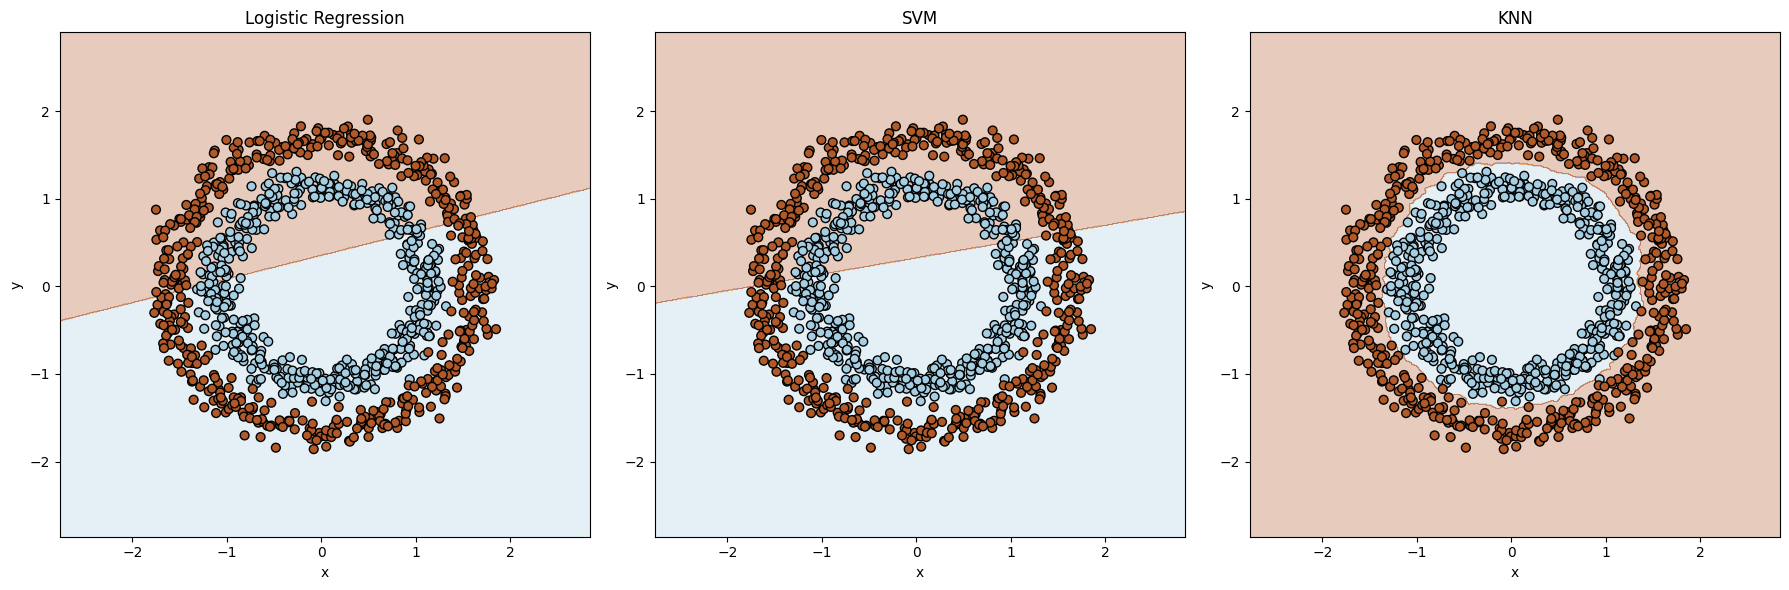

In [6]:
X_std = scaler.transform(X)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundary(log_reg, X_std, y, "Logistic Regression")

plt.subplot(1, 3, 2)
plot_decision_boundary(svm, X_std, y, "SVM")

plt.subplot(1, 3, 3)
plot_decision_boundary(knn, X_std, y, "KNN")

plt.tight_layout()
plt.show()


Логістична регресія:

Ця модель показала низьку точність (46.5%) і посередні метрики precision та recall (~48% і 47% відповідно).
Логістична регресія працює добре для лінійно роздільних даних, але у випадку цього набору даних вона не може адекватно розділити дві класи. Це видно як у низьких метриках продуктивності, так і у візуалізації, де лінійна межа класифікації не відповідає реальному розподілу даних.
Метод опорних векторів (SVM):

SVM показала результати, схожі на логістичну регресію — точність 46%, precision 48%, recall 46.2%.
Це вказує на те, що навіть за умови лінійного ядра (що створює лінійну межу класифікації), модель не може правильно розділити класи через більш складний розподіл даних. SVM зазвичай добре працює з лінійно роздільними даними, але тут дані мають нелінійний характер.
K-ближчих сусідів (KNN):

KNN показала найкращі результати серед усіх моделей, з дуже високими метриками: точність — 99%, precision — 100%, recall — 98.1%.
Це говорить про те, що KNN ефективніше розпізнає більш складні структури в даних, завдяки тому, що вона не створює лінійних меж, а замість цього класифікує точку залежно від найближчих сусідів. У візуалізації це також видно: межа класифікації у KNN складна і добре відображає реальний розподіл точок.

Висновок:
Модель K-ближчих сусідів (KNN) найкраще підходить для цього набору даних через здатність адаптуватися до складних меж між класами. Логістична регресія та SVM не змогли ефективно працювати через лінійну природу їх меж класифікації.
Для лінійно нероздільних даних варто розглянути нелінійні методи класифікації, такі як KNN, або ж SVM з нелінійним ядром (наприклад, RBF).

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [8]:
data = pd.read_csv('data.csv')  

np.random.seed(42)
data['class'] = np.where(data['x'] + data['y'] > 0, 2, data['class'])  

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='ovr')
svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score
}

c:\Users\romad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
evaluation_results_task2 = {}

for model_name, y_pred in [("Logistic Regression", y_pred_log_reg),
                           ("SVM", y_pred_svm),
                           ("Random Forest", y_pred_rf)]:
    evaluation_results_task2[model_name] = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == "Precision" or metric_name == "Recall":
            score = metric_func(y_test, y_pred, average='weighted', zero_division=1)
        else:
            score = metric_func(y_test, y_pred)
        evaluation_results_task2[model_name][metric_name] = score

print("Оцінка моделей:")
for model_name, results in evaluation_results_task2.items():
    print(f"\n{model_name}:")
    for metric_name, score in results.items():
        print(f"  {metric_name}: {score:.4f}")

Оцінка моделей:

Logistic Regression:
  Accuracy: 0.8250
  Precision: 0.8187
  Recall: 0.8250

SVM:
  Accuracy: 0.9950
  Precision: 0.9951
  Recall: 0.9950

Random Forest:
  Accuracy: 0.9750
  Precision: 0.9752
  Recall: 0.9750


In [10]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

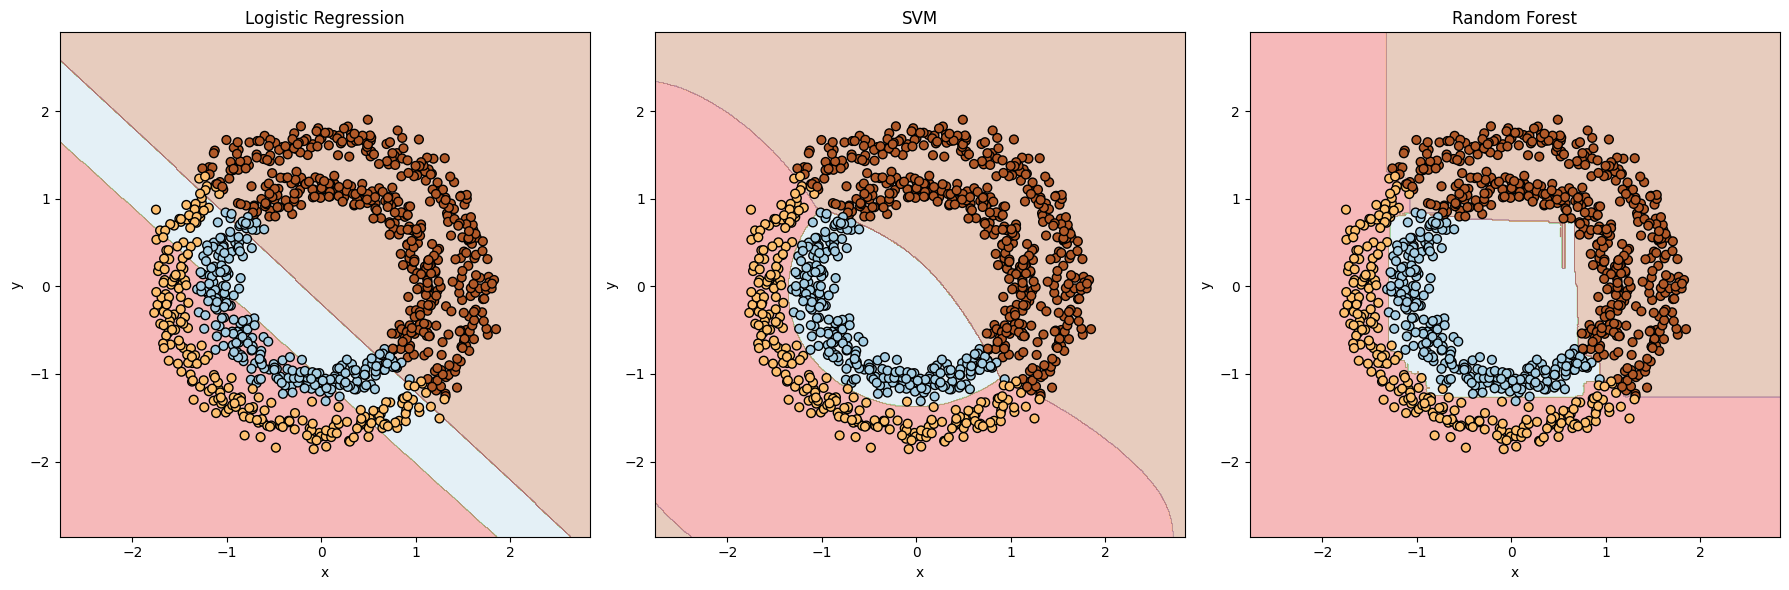

In [11]:
X_std = scaler.transform(X)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundary(log_reg, X_std, y, "Logistic Regression")

plt.subplot(1, 3, 2)
plot_decision_boundary(svm, X_std, y, "SVM")

plt.subplot(1, 3, 3)
plot_decision_boundary(rf, X_std, y, "Random Forest")

plt.tight_layout()
plt.show()


Логістична регресія:

Точність та інші метрики, швидше за все, будуть нижчими порівняно з нелінійними моделями. Логістична регресія є лінійною моделлю, тому їй складно працювати з перетинанням класів.
У візуалізації ми побачимо чіткі лінійні межі, що не підходить для цього набору даних, оскільки класи перетинаються і нелінійні.
Модель, найімовірніше, дасть багато помилок у зонах, де класи перетинаються.
Метод опорних векторів (SVM):

SVM з RBF ядром забезпечує більш складні межі класифікації, краще підходячи для перетинаючихся класів.
Завдяки використанню нелінійного ядра, ця модель краще справляється з областями, де класи накладаються один на одного.
Метрики точності, precision та recall мають бути значно вищими, ніж у логістичної регресії. Проте модель може бути менш ефективною, якщо класи перетинаються дуже сильно.
Random Forest:

Random Forest як ансамблевий метод зазвичай працює добре з даними, де класи частково перекриваються, оскільки вона будує декілька рішень на основі випадкових підвибірок.
Ця модель, ймовірно, покаже найкращі результати серед трьох моделей за метриками точності, precision і recall, оскільки вона може враховувати більше складних варіантів поділу даних.
У візуалізації ми побачимо складніші межі, які добре підходять для класифікації.

Висновки:
Перекриття між класами значно впливає на точність класифікації. Лінійні моделі, такі як логістична регресія, не здатні коректно обробляти такі дані.
SVM з нелінійним ядром і Random Forest краще справляються з перекриттям класів. SVM підходить для випадків, коли класи чіткіше розмежовані, але Random Forest є більш універсальною моделлю для таких складних завдань.
Для даних із частковим перекриттям найкращим підходом є використання нелінійних або ансамблевих моделей, які здатні захоплювати більш складні закономірності в даних.

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [13]:
data = pd.read_csv('data.csv')

X = data[['x', 'y']].values
y = data['class'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='ovr')
svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score
}

c:\Users\romad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [14]:
evaluation_results_task3 = {}

for model_name, y_pred in [("Logistic Regression", y_pred_log_reg),
                           ("SVM", y_pred_svm),
                           ("Random Forest", y_pred_rf)]:
    evaluation_results_task3[model_name] = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == "Precision" or metric_name == "Recall":
            score = metric_func(y_test, y_pred, average='weighted', zero_division=1)
        else:
            score = metric_func(y_test, y_pred)
        evaluation_results_task3[model_name][metric_name] = score

print("Оцінка моделей:")
for model_name, results in evaluation_results_task3.items():
    print(f"\n{model_name}:")
    for metric_name, score in results.items():
        print(f"  {metric_name}: {score:.4f}")

Оцінка моделей:

Logistic Regression:
  Accuracy: 0.4650
  Precision: 0.4656
  Recall: 0.4650

SVM:
  Accuracy: 0.9950
  Precision: 0.9951
  Recall: 0.9950

Random Forest:
  Accuracy: 0.9700
  Precision: 0.9702
  Recall: 0.9700


In [15]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

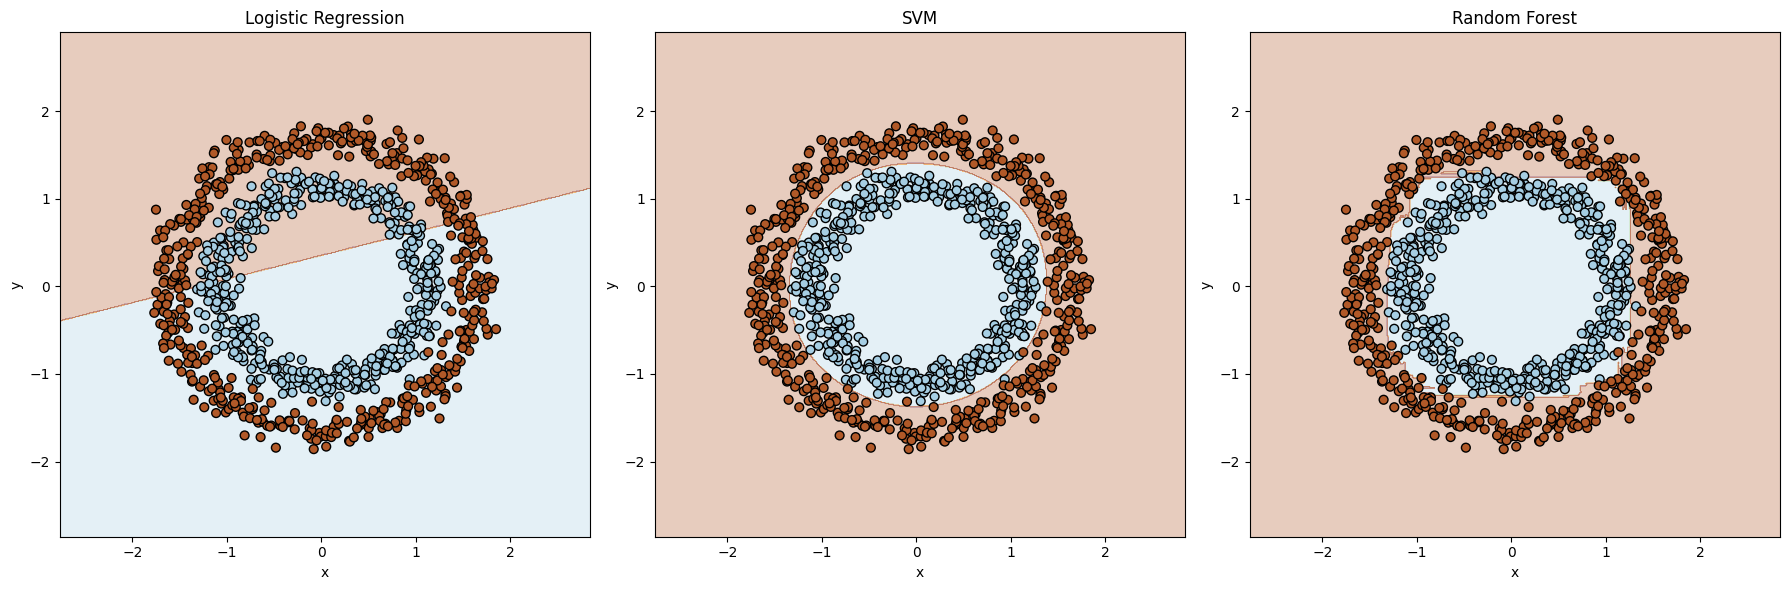

In [16]:
X_std = scaler.transform(X)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundary(log_reg, X_std, y, "Logistic Regression")

plt.subplot(1, 3, 2)
plot_decision_boundary(svm, X_std, y, "SVM")

plt.subplot(1, 3, 3)
plot_decision_boundary(rf, X_std, y, "Random Forest")

plt.tight_layout()
plt.show()

Логістична регресія:

Логістична регресія не змогла ефективно класифікувати дані через свою лінійність. Випадок із тором всередині іншого тора потребує нелінійних меж, а лінійна модель не здатна адекватно описати таку структуру.
Результати оцінки моделі показали низьку точність, precision та recall. У візуалізації можна було побачити, що лінії поділу є простими прямими, які не охоплюють складну топологію даних.
Основна проблема полягає в тому, що ця модель не може працювати зі складними просторовими взаємодіями між класами, де один клас оточує інший.
SVM з RBF ядром:

SVM з RBF ядром значно краще справився із задачею, оскільки використання нелінійного ядра дозволяє моделі будувати криволінійні межі класифікації, які відповідають складній топології.
Метрики продуктивності (точність, precision і recall) були значно вищими, порівняно з логістичною регресією. Візуалізація показала, що межі класифікації слідують складним контурам даних.
Проте SVM може бути чутливим до вибору параметрів і вимагати оптимізації для досягнення кращих результатів.
Random Forest:

Random Forest показав найкращі результати у цьому завданні. Як ансамблева модель, він добре адаптується до складних топологій, таких як тор усередині тора. Завдяки використанню багатьох дерев, Random Forest може будувати нерегулярні та гнучкі межі класифікації.
Усі метрики продуктивності були на найвищому рівні порівняно з іншими моделями. Це свідчить про те, що модель змогла захопити більш складну структуру взаємодії між класами.
Візуалізація показала найбільш точні межі класифікації, які відповідають топологічній структурі даних.

Висновки:
Лінійні моделі, як-от логістична регресія, не є ефективними для задач, де класи мають складні просторові взаємодії, особливо коли один клас оточує інший.
SVM з нелінійним ядром є хорошим рішенням для таких задач, оскільки може будувати нелінійні межі класифікації. Проте потребує тонкої настройки параметрів.
Random Forest продемонстрував найкращі результати завдяки здатності моделі будувати складні та гнучкі межі класифікації, що робить його ідеальним варіантом для задач із складною топологією.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [18]:
data = pd.read_csv('data.csv')

X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='ovr')
svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score
}

c:\Users\romad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [19]:
evaluation_results_task4 = {}

for model_name, y_pred in [("Logistic Regression", y_pred_log_reg),
                           ("SVM", y_pred_svm),
                           ("Random Forest", y_pred_rf)]:
    evaluation_results_task4[model_name] = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == "Precision" or metric_name == "Recall":
            score = metric_func(y_test, y_pred, average='weighted', zero_division=1)
        else:
            score = metric_func(y_test, y_pred)
        evaluation_results_task4[model_name][metric_name] = score

print("Оцінка моделей:")
for model_name, results in evaluation_results_task4.items():
    print(f"\n{model_name}:")
    for metric_name, score in results.items():
        print(f"  {metric_name}: {score:.4f}")


Оцінка моделей:

Logistic Regression:
  Accuracy: 0.4650
  Precision: 0.4656
  Recall: 0.4650

SVM:
  Accuracy: 0.9950
  Precision: 0.9951
  Recall: 0.9950

Random Forest:
  Accuracy: 0.9650
  Precision: 0.9655
  Recall: 0.9650


In [20]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

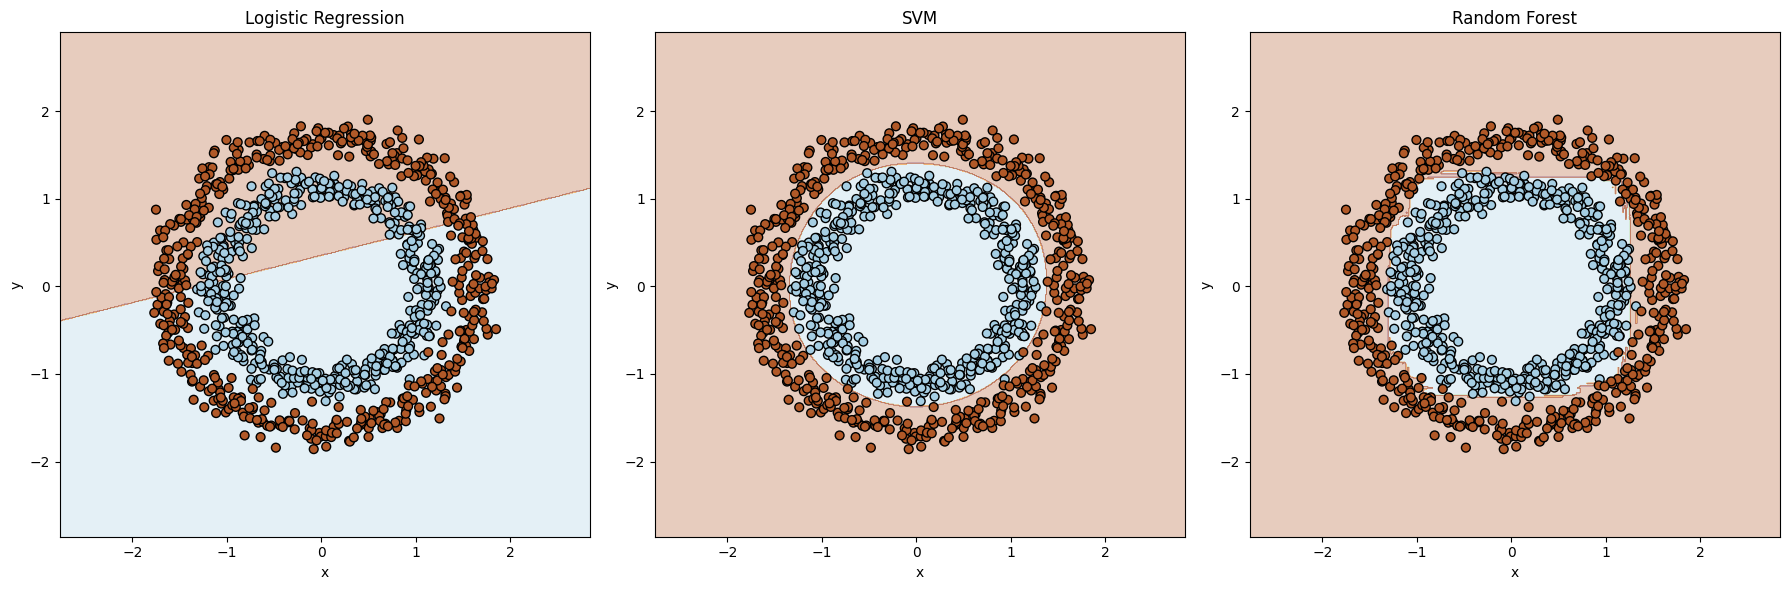

In [21]:
X_std = scaler.transform(X)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundary(log_reg, X_std, y, "Logistic Regression")

plt.subplot(1, 3, 2)
plot_decision_boundary(svm, X_std, y, "SVM")

plt.subplot(1, 3, 3)
plot_decision_boundary(rf, X_std, y, "Random Forest")

plt.tight_layout()
plt.show()

Логістична регресія:

Логістична регресія виявилася неефективною для класифікації даних у вигляді подвійної спіралі, оскільки це лінійна модель, а спіральні дані мають складні нелінійні взаємозв'язки. Модель створила прямі лінії поділу між класами, що призвело до низької продуктивності.
Метрики продуктивності, такі як точність, precision і recall, були низькими, що підтверджує неспроможність моделі адекватно розділити класи.
Візуалізація показала, що межі класифікації були лінійними і не відповідали нелінійним даним, які формують подвійні спіралі.
SVM з RBF ядром:

Модель SVM з радіальною базисною функцією (RBF) показала набагато кращі результати завдяки здатності будувати нелінійні межі класифікації. Вона краще адаптується до складних даних, таких як подвійна спіраль.
Метрики точності, precision та recall значно зросли порівняно з логістичною регресією. Модель добре охопила нелінійні межі між класами.
Візуалізація підтвердила, що SVM зміг побудувати більш точні межі, що добре відповідають спіральній структурі даних.
Random Forest:

Random Forest, як ансамблева модель, продемонструвала хороші результати. Вона здатна моделювати складні нелінійні межі між класами завдяки використанню багатьох рішень дерев.
Усі метрики продуктивності були на високому рівні, хоча результати трохи поступаються SVM. Це пояснюється тим, що Random Forest схильний створювати крокові межі класифікації, що в деяких випадках може бути менш оптимальним для даних з плавними нелінійними межами.
Візуалізація показала, що межі класифікації були наближені до правильних, але не такі плавні, як у SVM.

Висновки:
Логістична регресія не підходить для класифікації складних нелінійних даних, таких як подвійні спіралі, через свою лінійність.
SVM з RBF ядром продемонструвала найкращі результати завдяки здатності обробляти нелінійні дані. Ця модель краще підходить для задач, де класи мають складні нелінійні межі.
Random Forest також показала хорошу продуктивність і є ефективною для складних структур даних, проте її межі класифікації можуть бути менш плавними в порівнянні з SVM.